In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy.interpolate import make_interp_spline

In [210]:
df = pd.read_csv('file_fixed.csv',sep=";")
df

,type,T,p,size,result
0,seq,73.128693,1,100000000,5761455
1,seq,73.146984,1,100000000,5761455
2,seq,72.915517,1,100000000,5761455
3,seq,72.558012,1,100000000,5761455
4,seq,72.524107,1,100000000,5761455
...,...,...,...,...,...
132,hybrid,34.650875,16,100000000,5761457
133,hybrid,34.358116,16,100000000,5761457
134,hybrid,34.911199,16,100000000,5761457
135,hybrid,34.789289,16,100000000,5761457


In [211]:
seq = df.loc[df['type'] == 'seq']
seq = seq.groupby(["type", "p"]).min()
T1 = seq['T']
print(T1)

type  p
seq   1    72.379665
Name: T, dtype: float64


In [212]:
df = df[df['type'] != "seq"]
df = df.groupby(["type", "p"], as_index=False).min()
df

,type,p,T,size,result
0,hybrid,2,38.740628,100000000,5761457
1,hybrid,4,7.588269,100000000,5761457
2,hybrid,8,17.528972,100000000,5761457
3,hybrid,16,33.556335,100000000,5761457
4,mpi,2,36.746874,100000000,5761457
5,mpi,4,22.039501,100000000,5761457
6,mpi,8,11.479943,100000000,5761457
7,mpi,16,6.057528,100000000,5761457
8,openmp,2,40.008658,100000000,5761457
9,openmp,4,21.770010,100000000,5761457


# Przyspieszenie
- S(p) = Tsek/T(p) = T(1)/T(p)
# Efektywność 
- E(p) = S(p)/p * 100%

In [213]:

df['speed_up'] = df.apply(lambda x: T1/x["T"], axis=1)
df['efficiency'] = df.apply(lambda x: x["speed_up"]/x["p"], axis=1)
df


,type,p,T,size,result,speed_up,efficiency
0,hybrid,2,38.740628,100000000,5761457,1.868314,0.934157
1,hybrid,4,7.588269,100000000,5761457,9.538363,2.384591
2,hybrid,8,17.528972,100000000,5761457,4.129145,0.516143
3,hybrid,16,33.556335,100000000,5761457,2.156960,0.134810
4,mpi,2,36.746874,100000000,5761457,1.969682,0.984841
5,mpi,4,22.039501,100000000,5761457,3.284088,0.821022
6,mpi,8,11.479943,100000000,5761457,6.304880,0.788110
7,mpi,16,6.057528,100000000,5761457,11.948713,0.746795
8,openmp,2,40.008658,100000000,5761457,1.809100,0.904550
9,openmp,4,21.770010,100000000,5761457,3.324742,0.831185


In [214]:
def show_plots(type: str):
    data = df.loc[df["type"] == type]
    p = data["p"].tolist()
    show_plot("Czas wykonania", "p", "T(p)", p,  data["T"].to_list())
    show_plot("Przyspieszenie obliczeń", "p", "S(p)", p,  data["speed_up"].tolist())
    show_plot("Efektywność zrównoleglania", "p", "E(p)", p,  data["efficiency"].tolist())

def show_plot(title: str, x_label: str, y_label: str, x: list, y: list):
    # x = np.array(x)
    # y = np.array(y)
    # X_Y_Spline = make_interp_spline(x, y)
 
    # # Returns evenly spaced numbers
    # # over a specified interval.
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)
    
    # # Plotting the Graph
    # plt.plot(X_, Y_)
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()



### Analiza wydajności programów równoległych dal stałego rozmiaru zadania obliczeniowego

### OpneMP

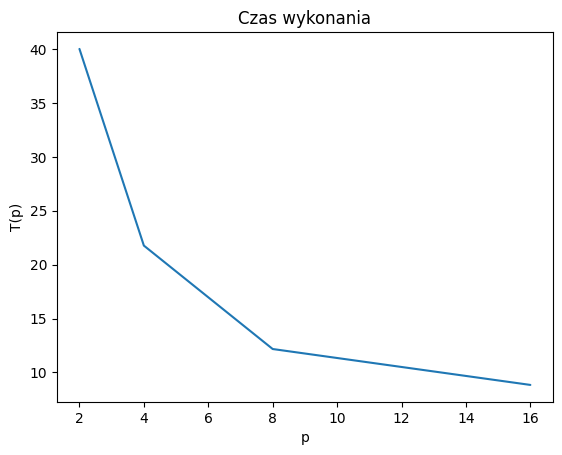

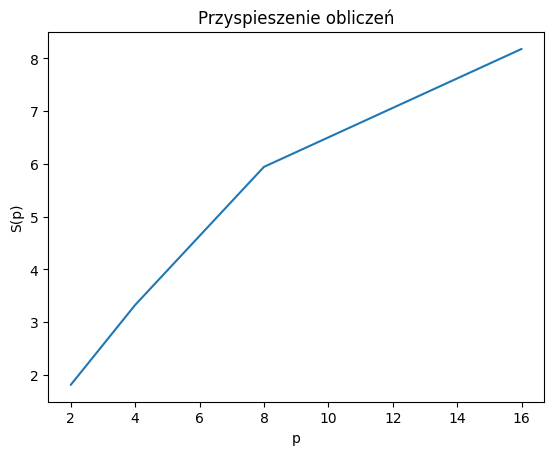

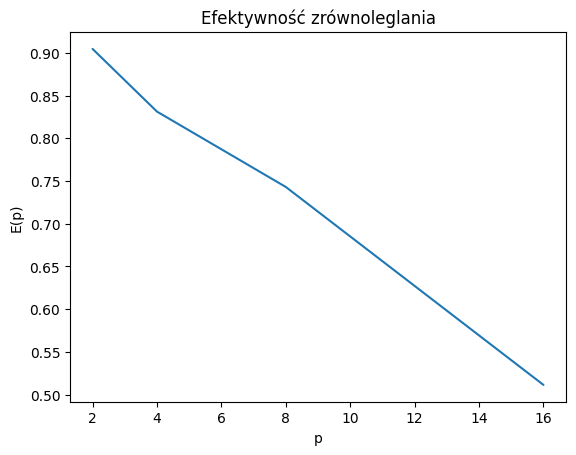

In [215]:
show_plots("openmp")

### MPI

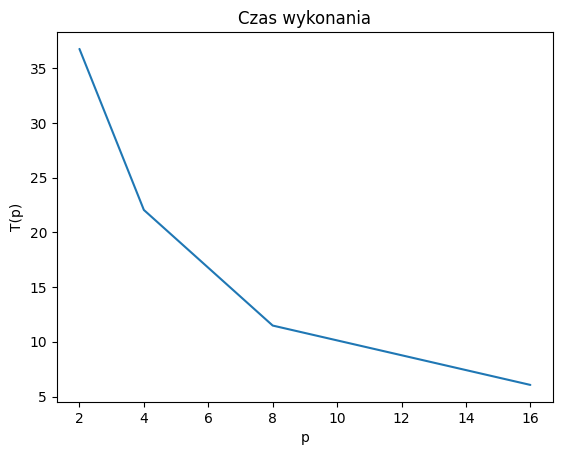

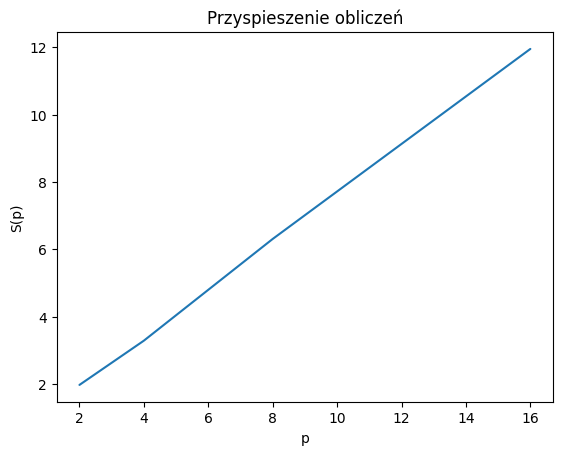

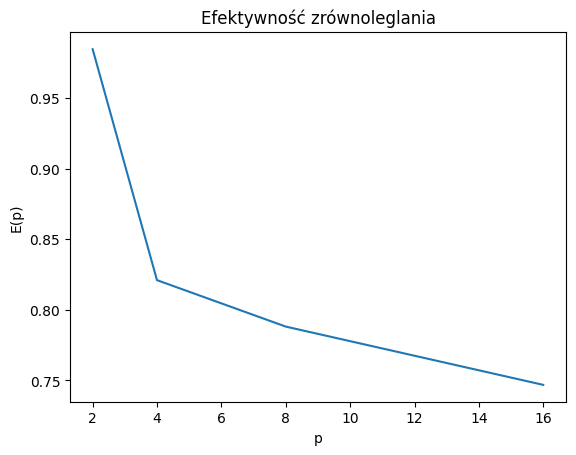

In [216]:
show_plots("mpi")

### MPI + OpenMP

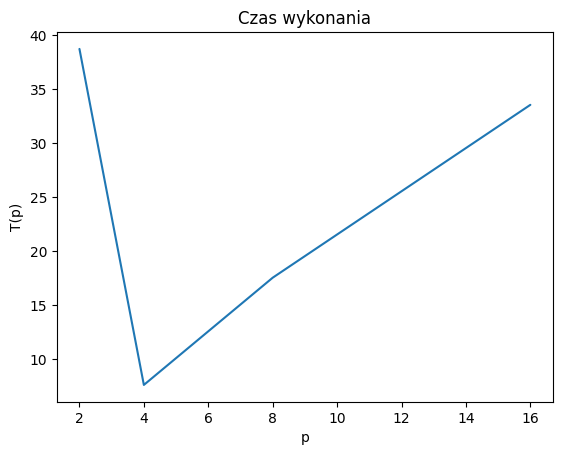

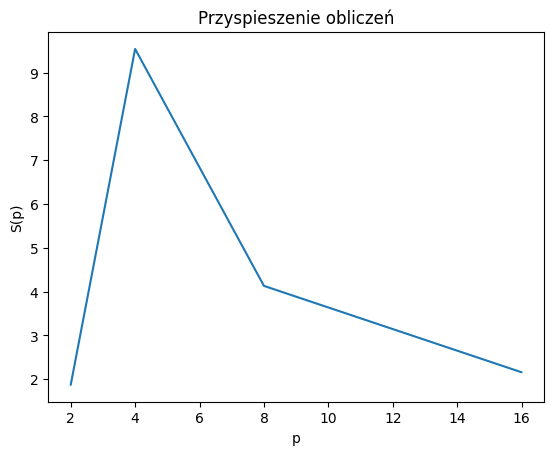

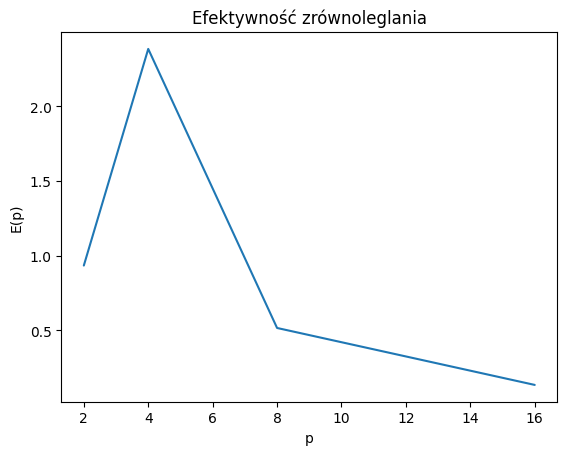

In [217]:
show_plots("hybrid")